In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,
                         n_redundant=0,n_classes=2,n_clusters_per_class=1,
                         random_state=41,hypercube=False,class_sep=20)

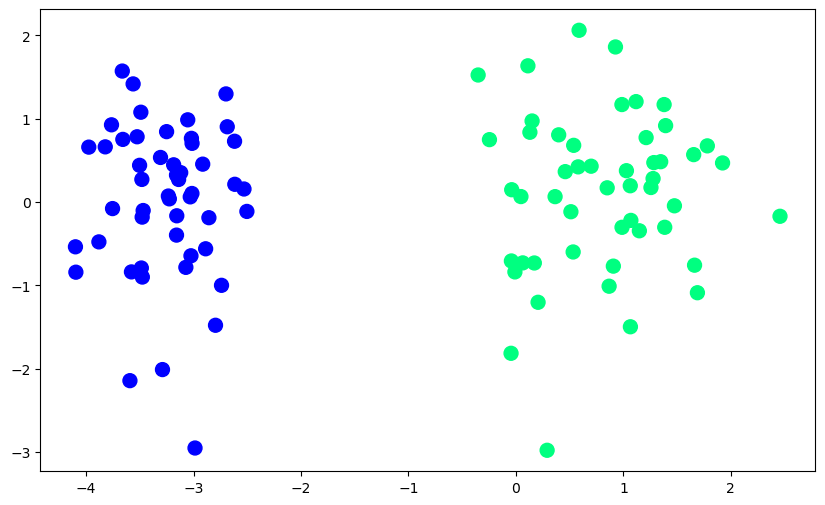

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none',solver='sag').fit(X,y)


C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
print(lr.coef_,lr.intercept_)

[[4.83356753 0.19914187]] [5.8275848]


In [16]:
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])
b1 = -(lr.intercept_/lr.coef_[0][1])

In [17]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [30]:
def mygd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    w = np.ones(X.shape[1])
    lr=0.5
    
    for i in range(5000):
        yhat = sig(np.dot(X,w))
        w = w + (lr*np.dot((y-yhat),X))/X.shape[0]
    
    return w[0],w[1:]
        
def sig(z):
    return 1/(1+np.exp(-z))

In [31]:
intercept_,coef_=mygd(X,y)

In [32]:
intercept_

5.833388649053249

In [33]:

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [34]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

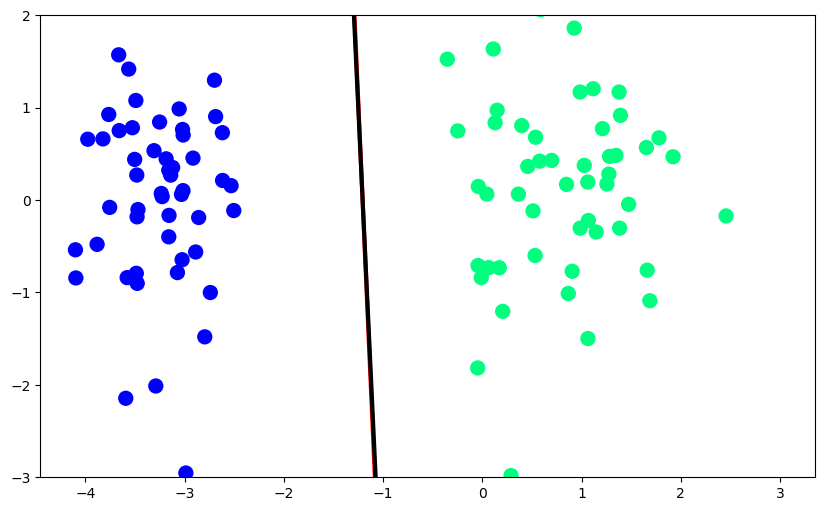

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)